# Capture and plot range profile from VNA S-parameter sweep

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_a = pd.read_csv("nov_16_metal_plate_1p5ghz_ante59inch.csv")
df_b = pd.read_csv("nov_16_metal_plate_1p5ghz_ante63inch3.csv")

In [4]:
vna_data_a = df_a.values
vna_data_b = df_b.values

In [5]:
freqa = vna_data_a[:-1,0]
power_a = vna_data_a[:-1,1]
deg_a = vna_data_a[:-1,2]
freqb = vna_data_b[:-1,0]
power_b = vna_data_b[:-1,1]
deg_b = vna_data_b[:-1,2]


rad_a = deg_a / 180 *np.pi
rad_b = deg_b / 180 *np.pi

In [6]:
power_a_amp = 10**(power_a/10) * np.array([np.exp(1j * i) for i in rad_a])
power_b_amp = 10**(power_b/10) * np.array([np.exp(1j * i) for i in rad_b])

In [7]:
def compute_pdp(s_params, frequencies):
    """PDP is power delay profile and is the inverse fourier transform of the s-parameters. This is also called range profile."""
    pdp = np.fft.ifft(s_params, n=2**10)
    delta_f = float(frequencies[1]) - float(frequencies[0])
    Rmax = 3e8/(2*delta_f)
    vRange = np.arange(len(pdp)) * Rmax/len(pdp)
    return pdp, vRange

a, vRangea = compute_pdp(power_a_amp, freqa)
b, vRangeb = compute_pdp(power_b_amp, freqb)

In [8]:
len(a)

1024

for plot a, peak is at  1.58203125


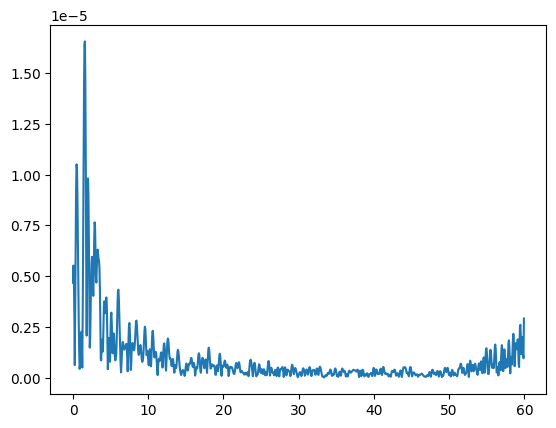

In [23]:

# print the point has the max value
print("for plot a, peak is at ", vRangea[np.argmax(np.abs(a))])
plt.plot(vRangea[:], np.abs(a)[:])

# add legend for second plot
# plt.legend(["plot a", "plot b"])
plt.show()

for plot b, peak is at  1.640625


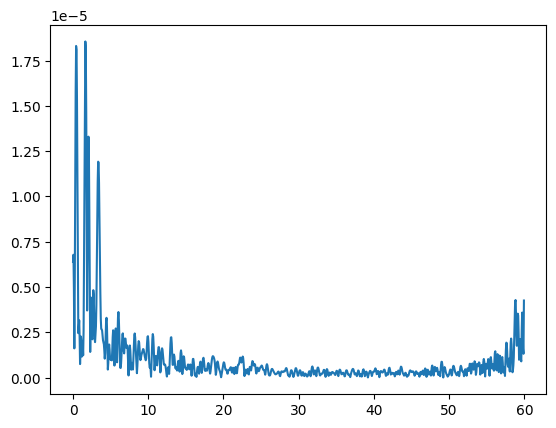

In [24]:
print("for plot b, peak is at ", vRangeb[np.argmax(np.abs(b))])
plt.plot(vRangeb[:], np.abs(b)[:])

In [9]:
chirp_duration = 2.586e-3
num_step = 256
f_1 = 7e9
f_0 = 6e9
bandwidth = f_1- f_0
delta_f = bandwidth / num_step